In [1]:
from kaggle_environments import make
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from dataclasses import dataclass

Loading environment football failed: No module named 'gfootball'


In [2]:
from lux.game import Game
from extractdata import MapState

game_state = None

def agent(observation, configuration):
    
    global game_state

    ### Do not edit ###
    if observation["step"] == 0:
        game_state = Game()
        game_state._initialize(observation["updates"])
        game_state._update(observation["updates"][2:])
        game_state.id = observation.player
    else:
        game_state._update(observation["updates"])
    
    ### Bot code ###
    actions = []
    
    if game_state.turn == 0:
        actions.append(annotate.circle(0, 0))
  
    return actions

In [3]:
@dataclass
class Count:
    res12: int = 0
    res16: int = 0
    res24: int = 0
    res32: int = 0
    count: int = 0
    fail: int = 0

In [4]:
counter = Count()
for i in range(10000):
    try:
        env = make('lux_ai_2021', configuration={
    #         'seed': 123456789, 
            'loglevel': 0, 
            'annotations': False, 
            'episodeSteps': 2,
        }, debug=False)
        steps = env.run([agent, 'simple_agent'])

        map_state = MapState(
            gamemap=game_state.map.map,
            width=game_state.map.width,
            height=game_state.map.height,
            player=game_state.players[0],
            opponent=game_state.players[(0 + 1) % 2],
            )

        map_state.set_resources()

        map_state.bd_wood[map_state.bd_wood > 0] = 1
        map_state.bd_coal[map_state.bd_coal > 0] = 1
        map_state.bd_uranium[map_state.bd_uranium > 0] = 1    

        if game_state.map.width == 12:
            try:
                wood12 += map_state.bd_wood
                coal12 += map_state.bd_coal
                uranium12 += map_state.bd_uranium
            except NameError:
                wood12 = map_state.bd_wood
                coal12 = map_state.bd_coal
                uranium12 = map_state.bd_uranium
            counter.res12 += 1

        if game_state.map.width == 16:
            try:
                wood16 += map_state.bd_wood
                coal16 += map_state.bd_coal
                uranium16 = map_state.bd_uranium
            except NameError:
                wood16 = map_state.bd_wood
                coal16 = map_state.bd_coal
                uranium16 = map_state.bd_uranium
            counter.res16 += 1

        if game_state.map.width == 24:
            try:
                wood24 += map_state.bd_wood
                coal24 += map_state.bd_coal
                uranium24 += map_state.bd_uranium
            except NameError:
                wood24 = map_state.bd_wood
                coal24 = map_state.bd_coal
                uranium24 = map_state.bd_uranium
            counter.res24 += 1

        if game_state.map.width == 32:
            try:
                wood32 += map_state.bd_wood
                coal32 += map_state.bd_coal
                uranium32 += map_state.bd_uranium
            except NameError:
                wood32 = map_state.bd_wood
                coal32 = map_state.bd_coal
                uranium32 = map_state.bd_uranium
            counter.res32 += 1
        counter.count += 1
        
    except:
        counter.fail += 1
            

In [5]:
print('Observation finaly: {}, failed: {}'.format(counter.count, counter.fail))

Observation finaly: 6163, failed: 3837


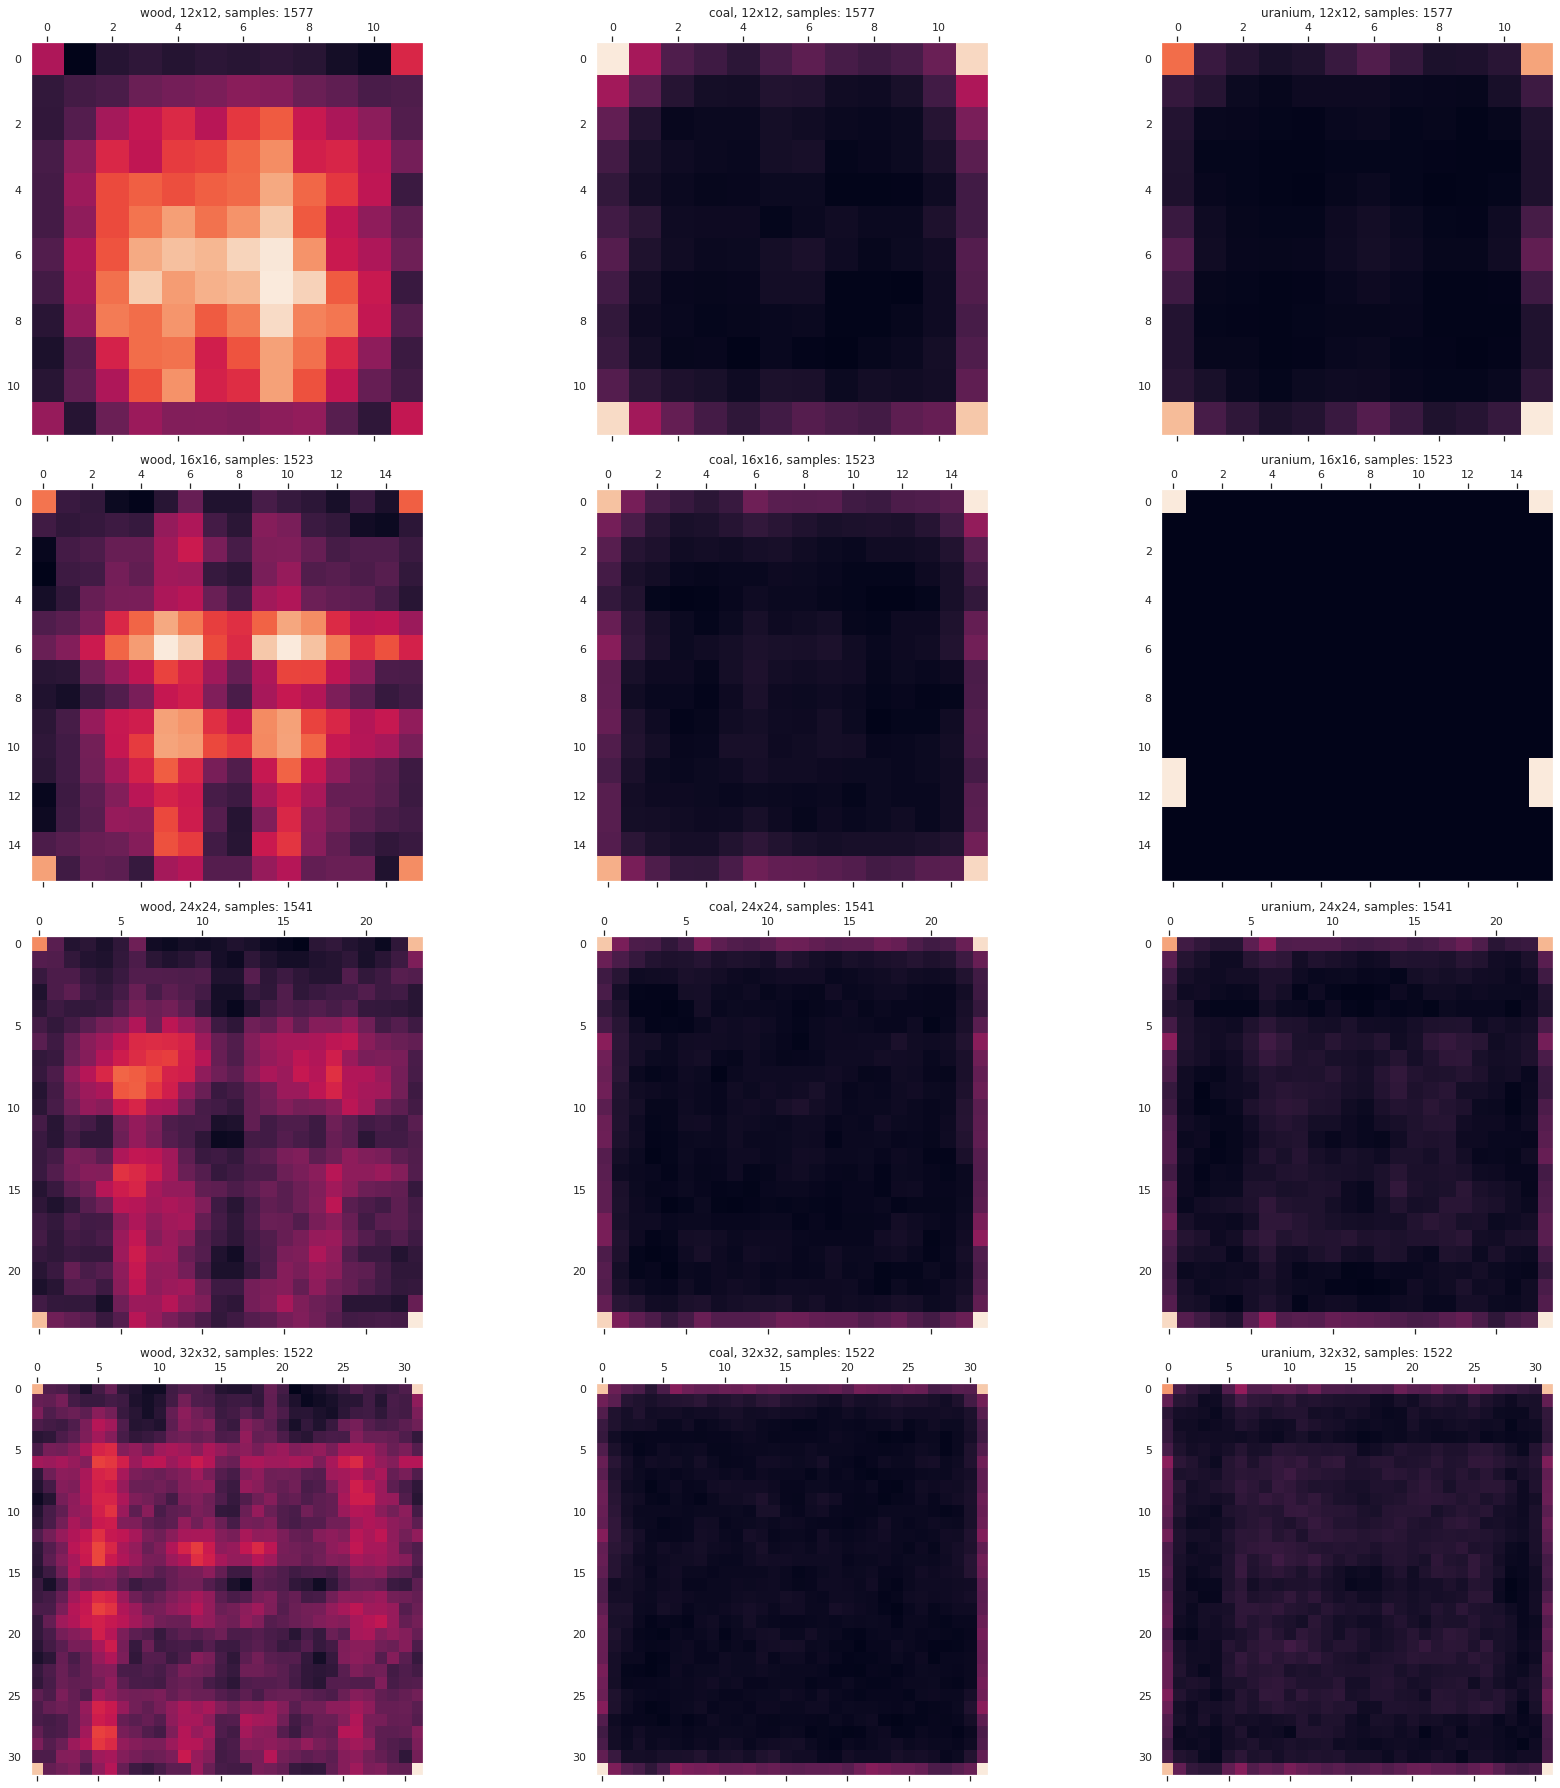

In [6]:
fig, axs = plt.subplots(nrows=4, ncols=3)
fig.set_figheight(25)
fig.set_figwidth(25)
axs[0, 0].matshow(wood12)
axs[0, 0].set_title(f'wood, 12x12, samples: {counter.res12}')
axs[0, 1].matshow(coal12)
axs[0, 1].set_title(f'coal, 12x12, samples: {counter.res12}')
axs[0, 2].matshow(uranium12)
axs[0, 2].set_title(f'uranium, 12x12, samples: {counter.res12}')
axs[1, 0].matshow(wood16)
axs[1, 0].set_title(f'wood, 16x16, samples: {counter.res16}')
axs[1, 1].matshow(coal16)
axs[1, 1].set_title(f'coal, 16x16, samples: {counter.res16}')
axs[1, 2].matshow(uranium16)
axs[1, 2].set_title(f'uranium, 16x16, samples: {counter.res16}')
axs[2, 0].matshow(wood24)
axs[2, 0].set_title(f'wood, 24x24, samples: {counter.res24}')
axs[2, 1].matshow(coal24)
axs[2, 1].set_title(f'coal, 24x24, samples: {counter.res24}')
axs[2, 2].matshow(uranium24)
axs[2, 2].set_title(f'uranium, 24x24, samples: {counter.res24}')
axs[3, 0].matshow(wood32)
axs[3, 0].set_title(f'wood, 32x32, samples: {counter.res32}')
axs[3, 1].matshow(coal32)
axs[3, 1].set_title(f'coal, 32x32, samples: {counter.res32}')
axs[3, 2].matshow(uranium32)
axs[3, 2].set_title(f'uranium, 32x32, samples: {counter.res32}')
for i in range(4):
    for j in range(3):
        axs[i, j].grid(None)
fig.tight_layout()

In [9]:
fig.savefig('../images/resource_distribution.png')

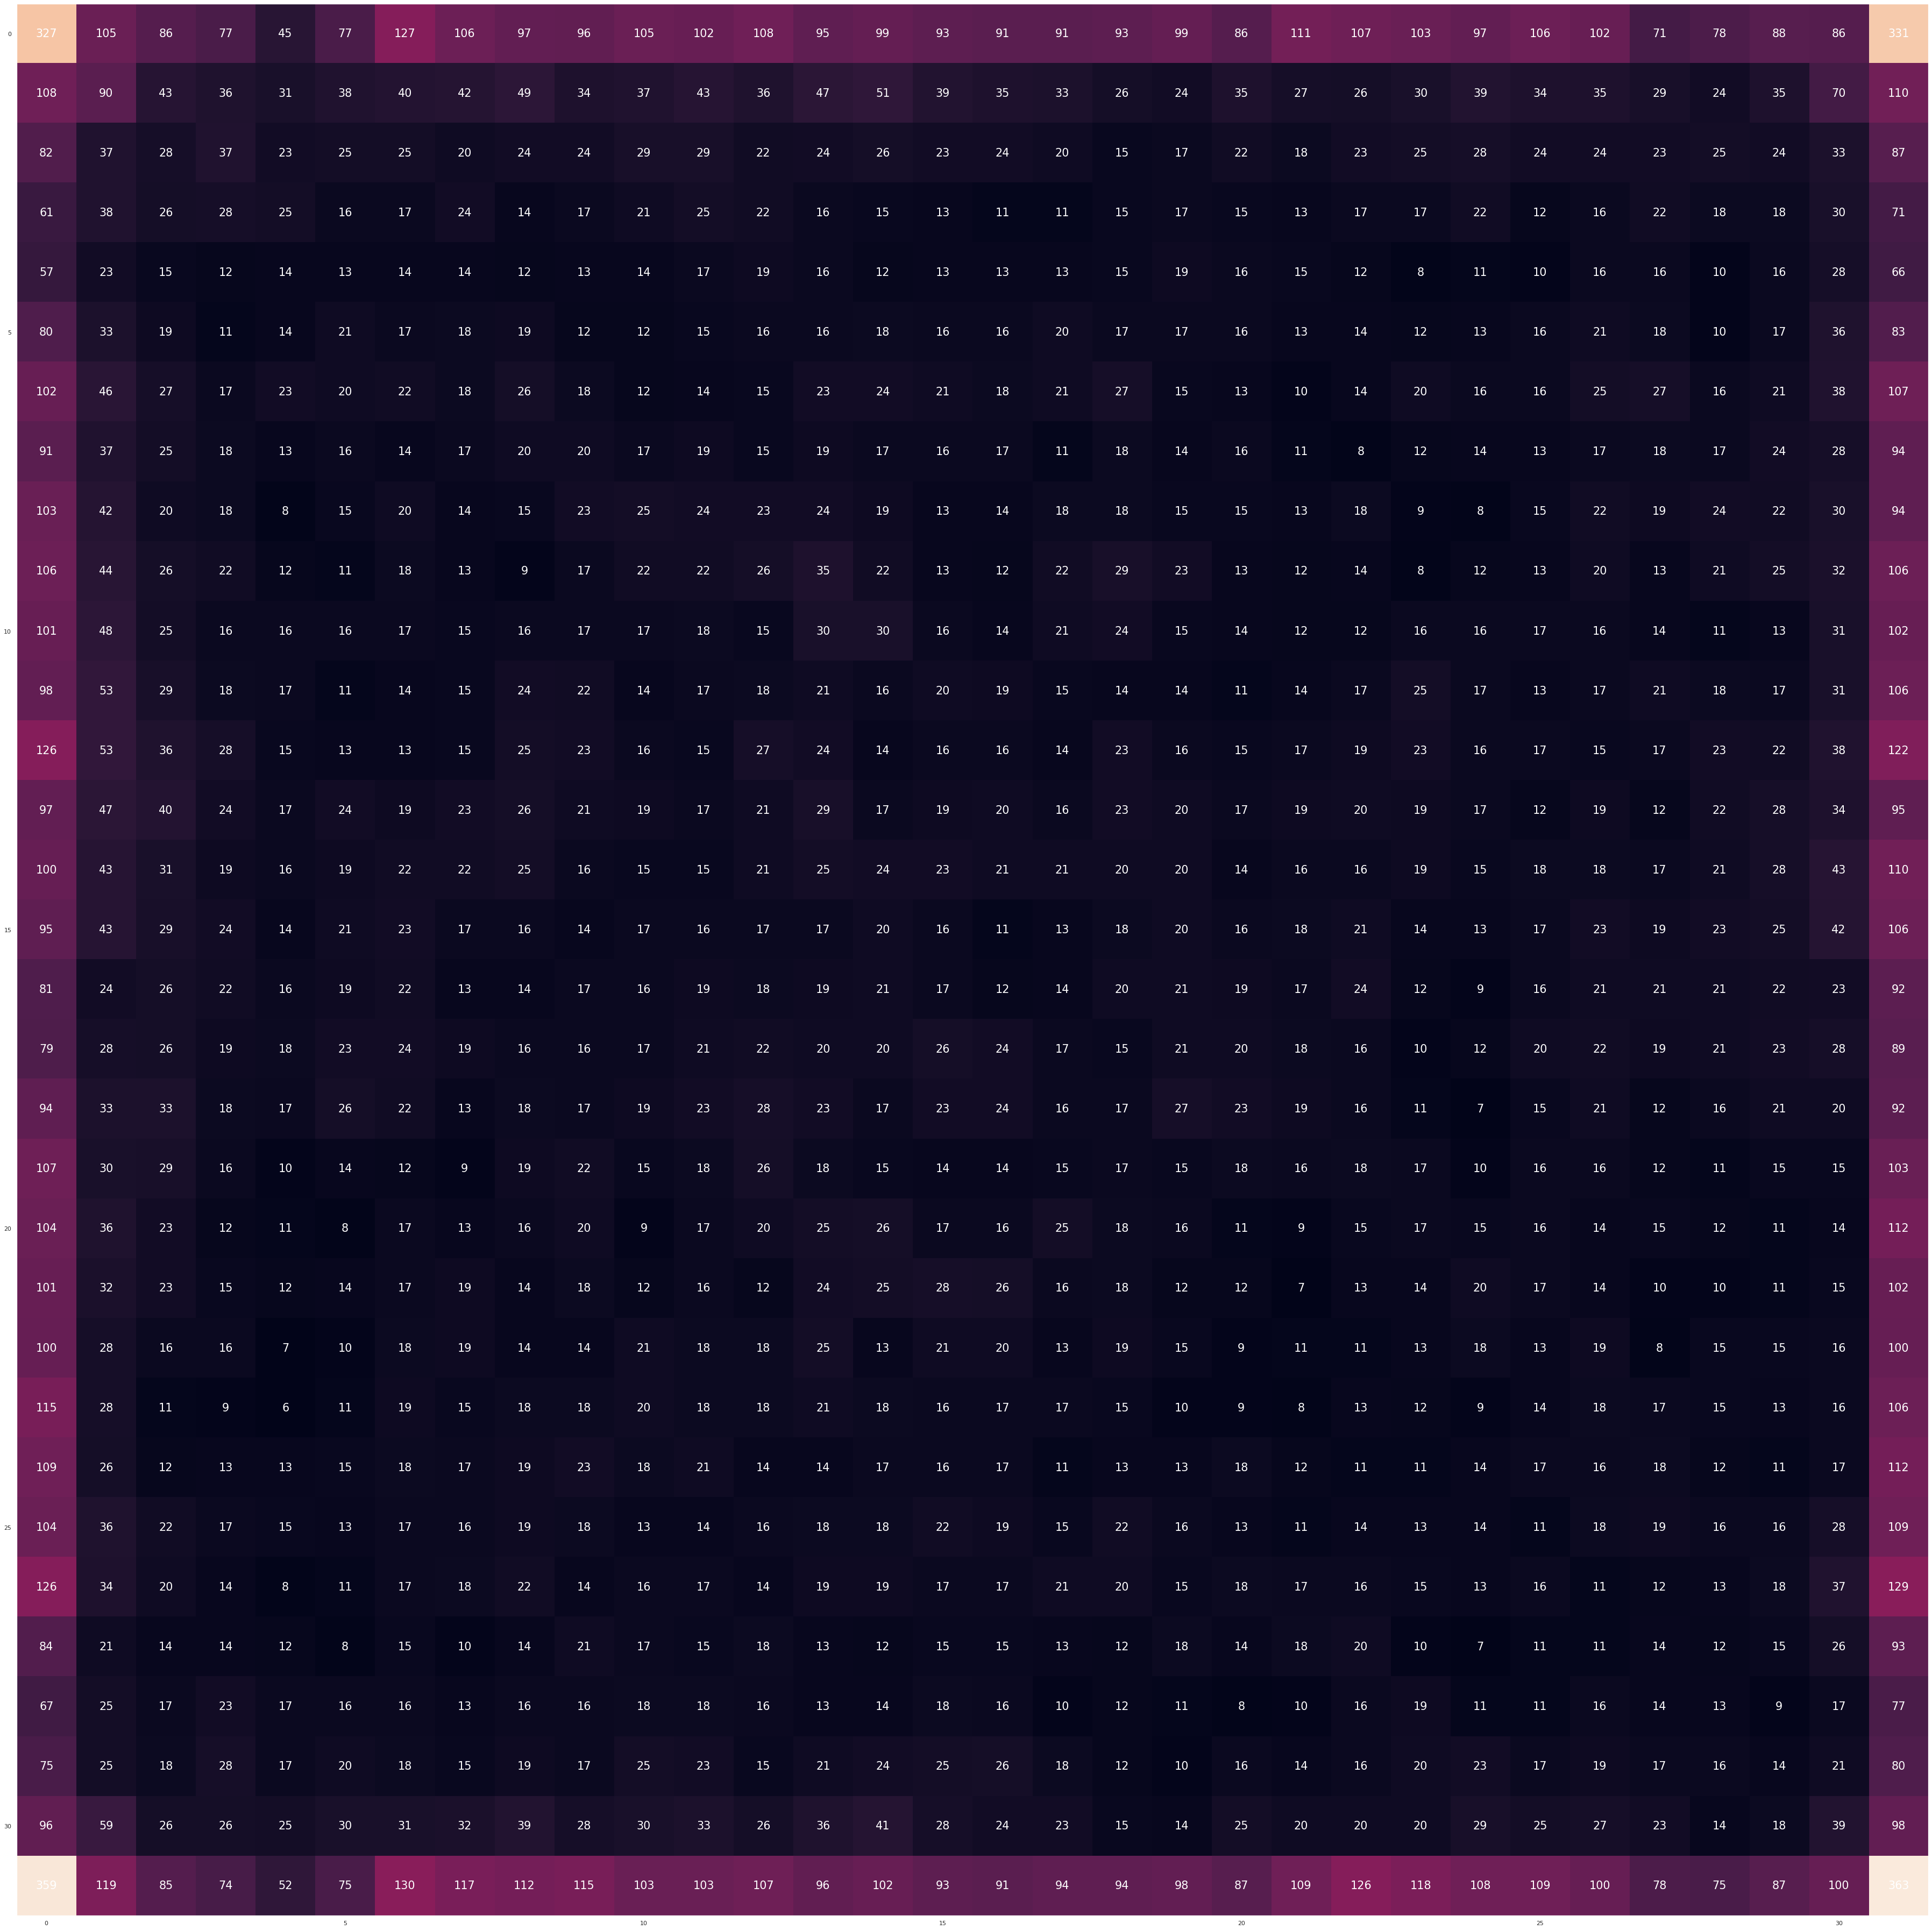

In [21]:
fig, ax = plt.subplots()
fig.set_figheight(50)
fig.set_figwidth(50)
im = ax.imshow(coal32)
# Loop over data dimensions and create text annotations.
for i in range(32):
    for j in range(32):
        text = ax.text(j, i, coal32[i, j],
                       ha="center", va="center", color="w", size="xx-large")
ax.grid(None)
fig.tight_layout()
plt.show()